<a href="https://colab.research.google.com/github/StefanoSassy/Todos-vs-Todos-NBA/blob/main/TodosvsTodosNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Todos contra todos

Trabajaremos con una base de datos de jugadores de la NBA, los datos incluyen: Rk Ranking del jugador en la tabla (probablemente por puntos u otra métrica). PLAYER Nombre del jugador, POSITION	posición del jugador (ej. PG, SG, SF, PF, C), AGE edad del jugador, MP Minutos totales jugados en la temporada, FG canastas de campo anotadas por partido. FGA intentos de canastas de campo por partido, FG% porcentaje de tiros de campo anotados (FG / FGA), 3P triples anotados por partido, 3PA intentos de triples por partido, 3P% porcentaje de triples anotados (3P / 3PA), 2P	canastas de dos puntos anotadas por partido, 2PA intentos de tiros de dos puntos por partido, 2P% porcentaje de tiros de dos puntos anotados, eFG%	porcentaje de tiro efectivo (ajustado por triples), FT tiros libres anotados por partido, FTA intentos de tiros libres por partido, FT% porcentaje de tiros libres anotados, ORB rebotes ofensivos por partido, DRB	rebotes defensivos por partido, TRB	rebotes totales por partido, AST asistencias por partido, STL robos por partido, BLK bloqueos por partido, TOV pérdidas de balón por partido, PF faltas personales por partido, POINTS puntos por partido, TEAM	abreviatura del equipo del jugador, GP juegos jugados en la temporada, MPG minutos jugados por juego, ORPM RPM ofensivo (Real Plus-Minus ofensivo),DRPM	RPM defensivo (Real Plus-Minus defensivo), RPM RPM total (ofensivo + defensivo), WINS_RPM Número de victorias estimadas por RPM. PIE Player Impact Estimate (métrica avanzada de impacto), PACE	ritmo del equipo (posesiones por partido), W número total de victorias del equipo, SALARY_MILLIONS salario del jugador (en millones de USD), PAGEVIEWS número de visitas a la página de Wikipedia del jugador, TWITTER_FAVORITE_COUNT número de veces que sus tweets fueron marcados como favoritos, TWITTER_RETWEET_COUNT número de veces que sus tweets fueron retuiteados.

El objetivo es aplicar técnicas de Ingeniería de características para clasificar las temporadas ganadoras y perdedoras de los equipos de la NBA utilizando las estadísticas de los jugadores.

Importamos el conjunto de datos de jugadores.

Y exploramos la "distribución" de los datos.



In [1]:
import pandas as pd

player_data = "nba_2017_players_with_salary_wiki_twitter.csv"
df = pd.read_csv(player_data)
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


<Axes: xlabel='W', ylabel='AGE'>

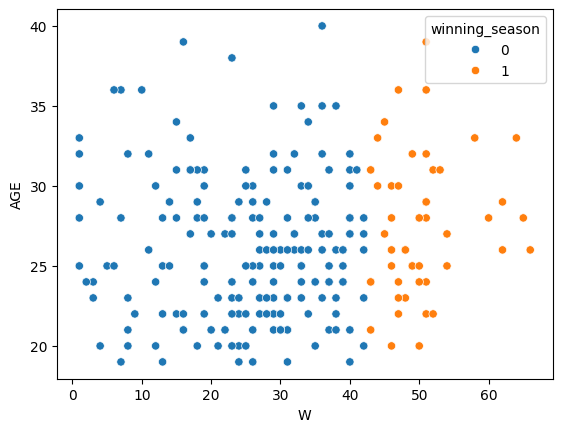

In [2]:
def winning_season(wins):

  if wins > 42:
      return 1
  return 0

df["winning_season"] = df["W"].apply(winning_season)

import seaborn as sns
sns.scatterplot(x="W", y="AGE", hue="winning_season", data=df)

#### Predict Winning Season

Seleccionar características clave como edad, puntos, salario, etc.

In [3]:
df2 = df[["AGE", "POINTS", "SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_FAVORITE_COUNT","winning_season", "TOV"]]
df = df2.dropna()
target = df["winning_season"]
features = df[["AGE", "POINTS","SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_FAVORITE_COUNT", "TOV"]]
classes = ["winning", "losing"]

In [4]:
df2.shape

(239, 7)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     239 non-null    int64  
 1   POINTS                  239 non-null    float64
 2   SALARY_MILLIONS         239 non-null    float64
 3   PAGEVIEWS               239 non-null    float64
 4   TWITTER_FAVORITE_COUNT  236 non-null    float64
 5   winning_season          239 non-null    int64  
 6   TOV                     239 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 13.2 KB


Manejamos los datos que faltan y preprocese las características.

In [33]:
df2 = df2.copy()
df2["TWITTER_FAVORITE_COUNT"] = df2["TWITTER_FAVORITE_COUNT"].fillna(df["TWITTER_FAVORITE_COUNT"].mean())
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     239 non-null    int64  
 1   POINTS                  239 non-null    float64
 2   SALARY_MILLIONS         239 non-null    float64
 3   PAGEVIEWS               239 non-null    float64
 4   TWITTER_FAVORITE_COUNT  239 non-null    float64
 5   winning_season          239 non-null    int64  
 6   TOV                     239 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 13.2 KB


#### Use the Feature To Predict a Winning Season

Vamos a "normalizar" los datos, que es simplemente comparar cada dato contra el promedio y la desviación estandar.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:5])  # Primeras filas del conjunto de entrenamiento
print(y_train[:5])  # Primeras etiquetas del conjunto de entrenamiento

(188, 6) (48, 6) (188,) (48,)
[[ 1.49192746 -0.49837513 -0.94605009 -0.42183656 -0.17689124 -0.41343606]
 [ 2.85049292 -1.12997668 -0.6615611   0.53310536  0.10657875 -0.87259328]
 [ 0.58621716 -0.60620954 -0.74058582 -0.3893017  -0.23211901 -1.10217189]
 [-1.22520345 -1.37645533 -0.94030284 -0.28788675 -0.2213667  -1.3317505 ]
 [-0.7723483  -0.80647345 -0.9805336  -0.39838801 -0.21892299 -0.75780397]]
146    1
216    0
159    0
235    0
182    0
Name: winning_season, dtype: int64


Graficamos la "distribución" de los datos a entrenar contra los datos para verificar. Hay que recordar que en modelos predictivos no se recomienda poner a entrenar todos los datos, por que ya no sería "aprendizaje" sino "memorización".

<ipython-input-9-721cddf601e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


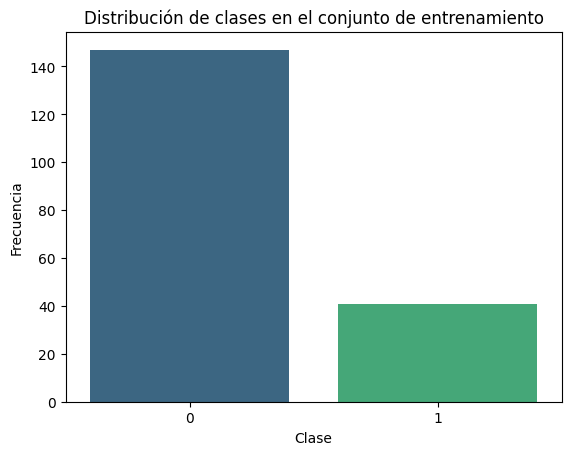

<ipython-input-9-721cddf601e2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="coolwarm")


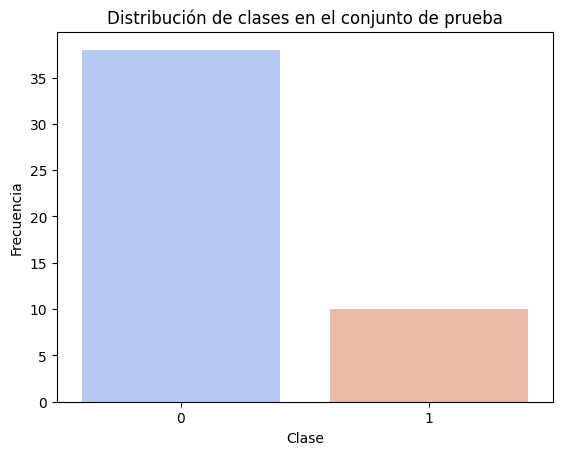

In [9]:
import matplotlib.pyplot as plt
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

sns.countplot(x=y_test, palette="coolwarm")
plt.title("Distribución de clases en el conjunto de prueba")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Seguimos con lo estandar, la matriz de correlación o matriz de covarianzas. Se recuerda que está matriz solo nos da información de la relación **lineal** de los datos.

                             AGE    POINTS  SALARY_MILLIONS  PAGEVIEWS  \
AGE                     1.000000 -0.000041         0.354779   0.166699   
POINTS                 -0.000041  1.000000         0.643019   0.443809   
SALARY_MILLIONS         0.354779  0.643019         1.000000   0.420632   
PAGEVIEWS               0.166699  0.443809         0.420632   1.000000   
TWITTER_FAVORITE_COUNT  0.047698  0.367364         0.236306   0.813626   
winning_season          0.139203  0.209811         0.247489   0.273526   
TOV                    -0.000097  0.820904         0.538096   0.422810   

                        TWITTER_FAVORITE_COUNT  winning_season       TOV  
AGE                                   0.047698        0.139203 -0.000097  
POINTS                                0.367364        0.209811  0.820904  
SALARY_MILLIONS                       0.236306        0.247489  0.538096  
PAGEVIEWS                             0.813626        0.273526  0.422810  
TWITTER_FAVORITE_COUNT          

<Axes: >

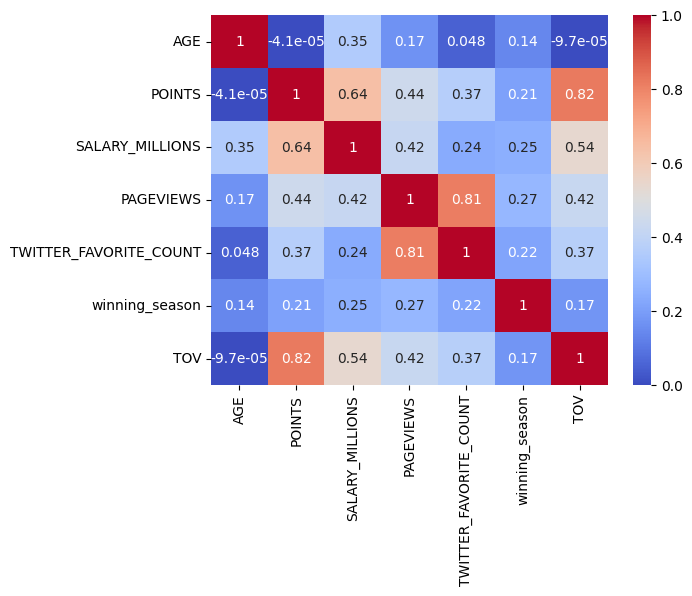

In [10]:
import seaborn as sns
print(df2.corr())
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")

Viene la parte de la predicción ¿Qué modelos escoger de entre tantos que hay? Cuando se quiere predecir la probabilidad de algún evento y hay ciertos parámetro que sí están relacionados linealmente **yo** sugiero empezar con *Regresión lineal*. El código a continuación es "estandar" para aplicar dicho modelo lo que nos importa ahora es la matriz de confusión.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Entrenar modelo
logistic_model = LogisticRegression(class_weight='balanced',random_state=42)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [12]:
# Predicciones
y_pred = logistic_model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=classes)
print("Reporte de Clasificación:")
print(report)

Precisión del modelo: 0.71
Matriz de Confusión:
[[30  8]
 [ 6  4]]
Reporte de Clasificación:
              precision    recall  f1-score   support

     winning       0.83      0.79      0.81        38
      losing       0.33      0.40      0.36        10

    accuracy                           0.71        48
   macro avg       0.58      0.59      0.59        48
weighted avg       0.73      0.71      0.72        48



La matriz de confusión puede parecer "confusa" (valga la redundancia). Para poder interpretarla corectamente veamos que otros parámetros podemos obtener de la predección. El siguiente código "estandar" muestra la importancia de los datos para el modelo, es decir, cuales tuvieron mas peso en la predicción y en la matriz de confusión. Primero buscamos el parámetro (número) que puede mejorar el modelo.

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    param_grid,
    cv=5
)
grid.fit(X_train, y_train)
print(f"Mejores parámetros: {grid.best_params_}")

Mejores parámetros: {'C': 0.001}


In [15]:
logistic_model = LogisticRegression(class_weight='balanced', C=0.001, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=classes)
print("Reporte de Clasificación:")
print(report)

Precisión del modelo: 0.77
Matriz de Confusión:
[[34  4]
 [ 7  3]]
Reporte de Clasificación:
              precision    recall  f1-score   support

     winning       0.83      0.89      0.86        38
      losing       0.43      0.30      0.35        10

    accuracy                           0.77        48
   macro avg       0.63      0.60      0.61        48
weighted avg       0.75      0.77      0.75        48



[[34  4]
 [ 7  3]]


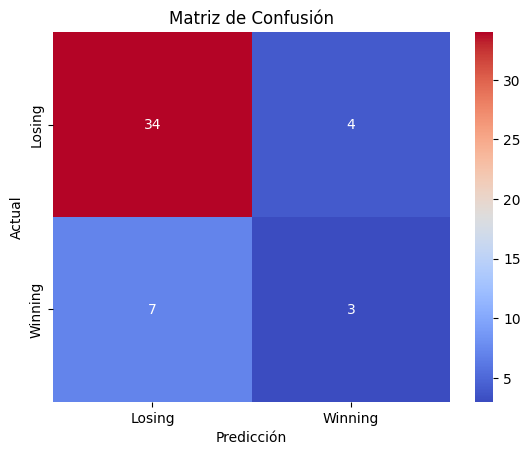

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Losing", "Winning"], yticklabels=["Losing", "Winning"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

### Precisión general
Primer modelo: 69%

Segundo modelo: 77%

Mejora: El segundo modelo tiene una mejor precisión general, lo que indica que hace un mejor trabajo clasificando temporadas ganadoras y perdedoras.

Cada matriz representa cómo se han clasificado correctamente (True Positives, True Negatives) e incorrectamente (False Positives, False Negatives) los casos.

#### Primer modelo

9 jugadores fueron clasificados incorrectamente como ganadores.

6 jugadores fueron clasificados incorrectamente como perdedores.

El modelo tiene problemas para clasificar temporadas "losing" (solo identificó 4 de 10 correctamente).

#### Segundo modelo

Mejoró la clasificación de temporadas ganadoras (34 correctas frente a 29 en el primer modelo).

Aún tiene dificultades con temporadas perdedoras, clasificó menos correctamente (solo 3 en vez de 4).

### Comparación de métricas

#### Precisión

Primer modelo: winning (0.83), losing (0.31)

Segundo modelo: winning (0.83), losing (0.43) 🔹 Mejora en precisión para temporadas "losing" (de 31% a 43%).

#### Recall (Sensibilidad)

Primer modelo: winning (0.76), losing (0.40)

Segundo modelo: winning (0.89), losing (0.30) 🔹 Mejora en recall para temporadas "winning" (de 76% a 89%), pero menor desempeño en temporadas "losing" (bajó de 40% a 30%).

### Conclusión

El segundo modelo es mejor en general (mayor precisión y mejor clasificación de temporadas ganadoras).

El primer modelo identifica mejor temporadas perdedoras (más recall en la clase "losing").

Si el objetivo es predecir temporadas ganadoras, el segundo modelo es preferible.

Si el objetivo es encontrar temporadas perdedoras con más precisión, el primer modelo es más equilibrado.

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca_features = pca.fit_transform(features_scaled)

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.51264575 0.18906959 0.18489091 0.06021555 0.02724904 0.02592916]


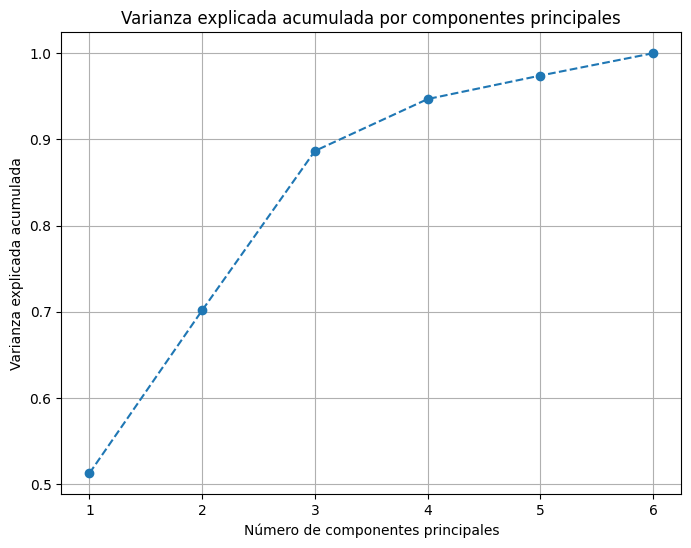

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

In [19]:
pca = PCA(n_components=3)  # Ajusta a los componentes que prefieras
final_pca_features = pca.fit_transform(features_scaled)

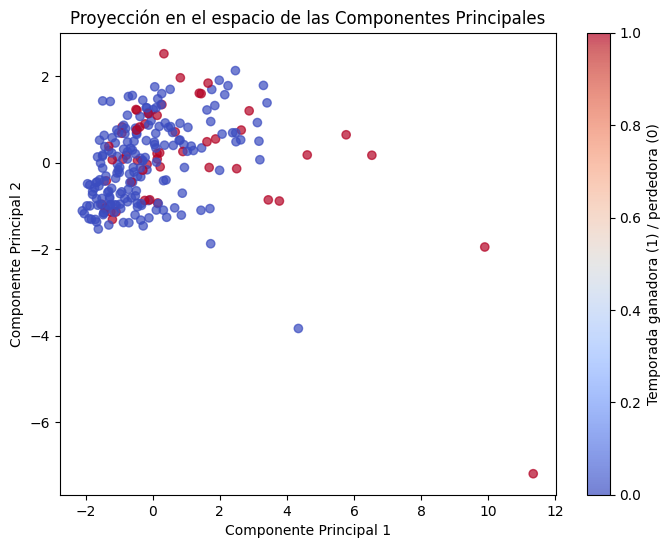

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(final_pca_features[:, 0], final_pca_features[:, 1], c=target, cmap="coolwarm", alpha=0.7)
plt.title("Proyección en el espacio de las Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Temporada ganadora (1) / perdedora (0)")
plt.show()

**Entrenamiento del Modelo de Clasificación en el conjunto de datos diseñado**

Los Bosques Aleatorios son un clasificante, es decir, clasifica los datos dada su importancia.

In [21]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=["Losing", "Winning"]))

Accuracy: 0.8333333333333334

Matriz de confusión:
 [[38  0]
 [ 8  2]]

Reporte de clasificación:
               precision    recall  f1-score   support

      Losing       0.83      1.00      0.90        38
     Winning       1.00      0.20      0.33        10

    accuracy                           0.83        48
   macro avg       0.91      0.60      0.62        48
weighted avg       0.86      0.83      0.79        48



AGE                       0.112563
POINTS                    0.161673
SALARY_MILLIONS           0.151058
PAGEVIEWS                 0.233827
TWITTER_FAVORITE_COUNT    0.216318
dtype: float64


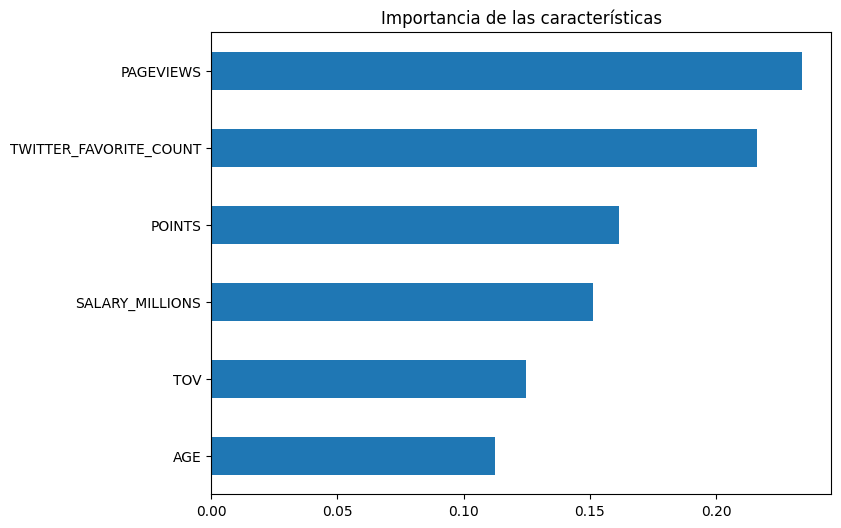

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns)
print(feature_importances.head())
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Importancia de las características")
plt.show()

Los modelos anteriores eran modelos supervisados, vamos a clasificar ahora con no-supervisados y justo el mas utilizado es el SVM.

In [24]:
from sklearn.svm import SVC
# Entrenamos el modelo
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predicción
y_pred = svm_model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Matriz de confusión:
 [[34  4]
 [ 8  2]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        38
           1       0.33      0.20      0.25        10

    accuracy                           0.75        48
   macro avg       0.57      0.55      0.55        48
weighted avg       0.71      0.75      0.72        48



Utilizamos el truco del kernel, es decir buscamos algún patrón no-lineal en nuestros datos.

In [25]:
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rbf))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rbf))

Accuracy: 0.7291666666666666
Matriz de confusión:
 [[32  6]
 [ 7  3]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.33      0.30      0.32        10

    accuracy                           0.73        48
   macro avg       0.58      0.57      0.57        48
weighted avg       0.72      0.73      0.72        48



Por último, usamos el clasificador mas potente a la mano XGBoost, recordemos que potencia no significa exactitud.

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculamos el ratio para balancear
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Entrenamos el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                    scale_pos_weight=scale_pos_weight,
                    random_state=42)

xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.75
Matriz de confusión:
 [[32  6]
 [ 6  4]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.40      0.40      0.40        10

    accuracy                           0.75        48
   macro avg       0.62      0.62      0.62        48
weighted avg       0.75      0.75      0.75        48



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Si ninguno de nuestro modelos nos convece al clasificar falsos-positivos, falsos-negativos, etc, podemos mezclar las probabilidades para ver si mejora la predicción. En estos momentos los verdaderos-negativos y los falsos-negativos son los que más nos causan problemas.

In [27]:
import numpy as np


# Paso 1: Obtener las probabilidades de clase positiva
proba_log = logistic_model.predict_proba(X_test)[:, 1]
proba_xgb = xgb.predict_proba(X_test)[:, 1]

proba_rf = rf_model.predict_proba(X_test)[:, 1]
proba_ensemble = (proba_log + proba_xgb + proba_rf) / 3

# Paso 3: Clasificación final con umbral
y_pred_ensemble = (proba_ensemble >= 0.5).astype(int)

# Paso 4: Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_ensemble))

Accuracy: 0.8125
Matriz de confusión:
 [[35  3]
 [ 6  4]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.57      0.40      0.47        10

    accuracy                           0.81        48
   macro avg       0.71      0.66      0.68        48
weighted avg       0.79      0.81      0.80        48



Finalemente, para tener una representaición gráfica de como se comportan los modelos al intentar clasificar "wining-losing" utilizamos las curvas ROC y Presición.

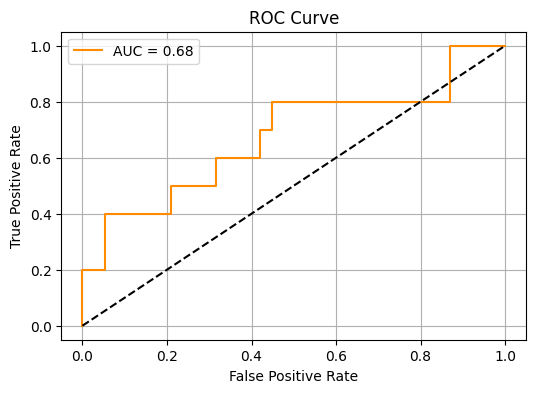

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
# ROC
fpr, tpr, thresholds = roc_curve(y_test, proba_ensemble)
auc_score = roc_auc_score(y_test, proba_ensemble)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # línea de azar
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

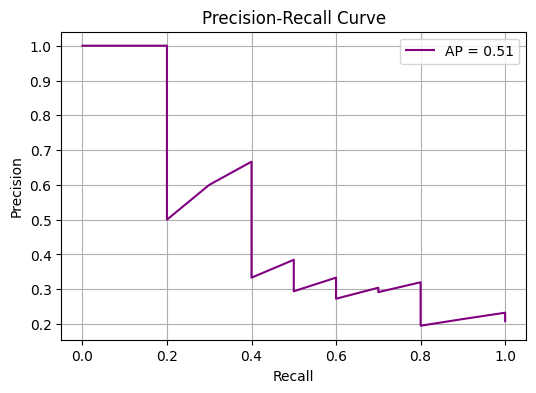

In [29]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, proba_ensemble)
ap_score = average_precision_score(y_test, proba_ensemble)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AP = {ap_score:.2f}", color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()